# Model 2: High resolution prediction of flood maps

The output of this model is used to measure global performance the performance of the pipeline.

**The last section of this notebook create a submission file for the challenge**

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import src.baseline_model02 as bm
import shutil

# Training

The next cell allows you to quickly test models by reducing the amount of data used.

*nb_train_minicube*, *nb_test_minicube* and *nb_val_minicube*, are used to limit the number of "mini data cube" used in train/test/val sets and therefore reduce the computational cost of the training and hyper parameters exploration. With also only keep minicubes above the *min_score_model1* threshold.

If you choose a high number of minicubes, the threshold should be low enough.


In [2]:
baseline_model_generator_test = bm.BaseLineModel(
    "localdata/smallbox/label/label_",
    train_start = "2002-08-03",  # date where to split train test
    train_end = "2003-03-17",  # date where to split train test
    dynamic_features_path = "localdata/Model1_score_ERA5_Rez_v2.nc",
    static_features_root_path = "localdata/smallbox/static/static_",
    dynamic_features_FR_path = "localdata/Model1_Score_Full_Rez_v2.nc",
    inf_dynamic_features_FR_path = "localdata/Model1_Score_Full_Rez_inf.nc",
    static_features_FR_path = "localdata/static_Full_Rez.nc",
    labels_ERA5_path = "localdata/final_label_Full_ERA5.nc",
    labels_FR_path = "localdata/final_label_Full_Rez.nc",
    nb_train_minicube = 600, #Those values are very small for good performance you will need more datacubes
    nb_test_minicube = 20, #Those values are very small for apropriate test you will need more datacubes
    nb_val_minicube = 20,
    min_score_model1 = 0.2,
    name="Baseline_Model_2_Small_20_02",
    seed=1
    )

### Preparation of the train / test / val dataset

When using a high number of minicubes or low threshold, this process can still be quite long. The vectorised train / test / val can be saved to gain time when training several models on the same data.

In [3]:
baseline_model_generator_test.prepare_data()

# TP train : 568
# FP train : 323
# TP test : 235
# FP test : 205
# TP val : 149
# FP val : 214


### Training

Training a Random Forest with all features, 150 trees and depth 8.

In [4]:
baseline_model_generator_test.train_model([True, #soilgrid_bdod
                                          True, #soilgrid_cfvo
                                          True, #soilgrid_silt
                                          True, #soilgrid_clay
                                          True, #soilgrid_sand
                                          True, #depth_to_bedrock
                                          True, #altitude
                                          True, #aspect
                                          True, #slope
                                          True, #water_density
                                          True, #watershed
                                          True, #topological_catchment_areas
                                          True, #dist_sea
                                          True, #floodable
                                          True, #flood_count
                                          True, #dist_riv
                                          True #M1_score
                                          ],
                                          compute_xval = False) # Set to true to get the X-Val score (AUC-ROC by default)

Learning rate set to 0.5
0:	learn: 0.0724726	test: 0.0725030	best: 0.0725030 (0)	total: 970ms	remaining: 1m 36s
99:	learn: 0.0000877	test: 0.0003294	best: 0.0003291 (92)	total: 1m 28s	remaining: 0us

bestTest = 0.0003291025352
bestIteration = 92

Shrink model to first 93 iterations.
Learning rate set to 0.5
0:	learn: 0.0724171	test: 0.0726488	best: 0.0726488 (0)	total: 4.38s	remaining: 7m 13s
99:	learn: 0.0000572	test: 0.0008522	best: 0.0008396 (75)	total: 2m 42s	remaining: 0us

bestTest = 0.0008395555343
bestIteration = 75

Shrink model to first 76 iterations.
Learning rate set to 0.5
0:	learn: 0.0725047	test: 0.0724089	best: 0.0724089 (0)	total: 4.02s	remaining: 6m 38s
99:	learn: 0.0001125	test: 0.0000718	best: 0.0000644 (16)	total: 2m 24s	remaining: 0us

bestTest = 6.435125896e-05
bestIteration = 16

Shrink model to first 17 iterations.
Learning rate set to 0.5
0:	learn: 0.0725102	test: 0.0724209	best: 0.0724209 (0)	total: 5.54s	remaining: 9m 9s
99:	learn: 0.0001158	test: 0.0000384	

0.998908830865136

### Saving and loading model

Vectorised test/train/validation dataset and trainned models are saved (the Full test saved is saved independently)

In [5]:
baseline_model_generator_test.save_to_disk()

#if you want to load a previously trained model :
#baseline_model_generator_test = baseline_model_generator_test.load_from_disk("Baseline_Model_2_Small_20_02")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [6]:
baseline_model_generator_test = baseline_model_generator_test.load_from_disk("Baseline_Model_2_Small_20_02")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


# Model Analysis

### Feature importance

M1_score: 157.48076214288324
floodable: 68.96886465078866
flood_count: 56.71873996344465
topological_catchment_areas: 37.1734064011167
soilgrid_cfvo: 35.70001820013035
slope: 29.737511591366562
altitude: 24.643420282673638
dist_sea: 23.3605990046472
soilgrid_silt: 13.421624769086396
water_density: 11.390858144344364
depth_to_bedrock: 11.361636032591752
soilgrid_sand: 9.762879872827293
aspect: 8.254905205029269
soilgrid_clay: 6.755202040561833
soilgrid_bdod: 3.4063280718005524
dist_water: 1.362140269959244
watershed: 0.5011033567483059


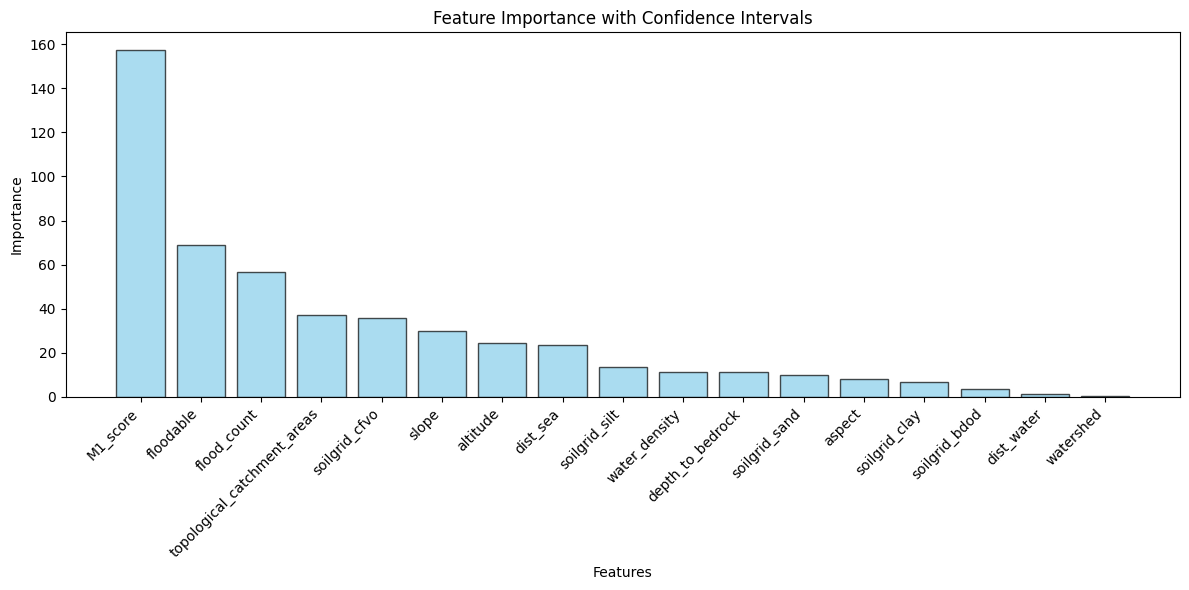

In [7]:
baseline_model_generator_test.print_feature_importance()

### Geographical results

##### Prediction score Map

##### False Positive, True Positive, False Negative Mapping

In [8]:
#baseline_model_generator_test.load_FullRez()

In [9]:
#baseline_model_generator_test.print_TNTPFN(save_path="graph/model2/TNTPFN/", thresholdM1=0.5, thresholdM2=0.5)

In [10]:
#baseline_model_generator_test.print_proba(save_path="graph/model2/Proba/", thresholdM1=0.5, thresholdM2=0.5)

This function can also be used to print a zoomed map :

In [11]:
#baseline_model_generator_test.print_proba(save_path="graph/model2/ProbaReduced/", 
#                                          thresholdM1=0.5, 
#                                          thresholdM2=0.5,
#                                          min_x=3500,
#                                          min_y=2500)

### Performance analysis

### Pre-processing of the full test data

Loading of the Full Test Dataset from disk.
The vectorised Full train test (all France data on the define time slices for test train might be quite long to process).
Furthermore the *Full test set*, by nature, is fixed, so we process the vectorised *Full Test Set* independently.
When you have done this process one time you don't need to do it again as long as you don't change your first model outputs.

In [12]:
#baseline_model_generator_test.prepare_data(compute_full_test_set=True) #This will take a while, only do it one time
#baseline_model_generator_test.save_full_test_to_disk(name="Full") #Saving the results to disk
#baseline_model_generator_test.load_full_test_from_disk(name="Full") #Loading the results from disk, start from here if you already computed the full test set

#### ROC plots

In [13]:
#baseline_model_generator_test.auc_graph("Full_Test", "", [0.01,0.05,0.1,0.15, 0.2,0.3, 0.5, 0.9])

In [14]:
#baseline_model_generator_test.process_AUC_metrics(filter=False)

In [15]:
#baseline_model_generator_test.process_prediction_metrics(filter=False)

# Computation of predictions for codabench

#### Data loading

In [16]:
baseline_model_generator_test.load_InfRez()

saving predictions

In [17]:
baseline_model_generator_test.save_full_pred() #this can be quite long
#reduction_factor can be used to compute the prediction on smaller batch of the data, (higher values means smaller batch).
#baseline_model_generator_test.save_full_pred(reduction_factor = 20) 

(9, 3936, 5953)


#### Printing of the prediction map

(This is optionnal) you can find the resulting graph in graph/Model2/inference/

In [18]:
baseline_model_generator_test.print_proba_inf(save_path="graph/Model2/inference/")

2003-11-02T00:00:00.000000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2003-11-09T00:00:00.000000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2003-11-16T00:00:00.000000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2003-11-23T00:00:00.000000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2003-11-30T00:00:00.000000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2003-12-07T00:00:00.000000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2003-12-14T00:00:00.000000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2003-12-21T00:00:00.000000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2003-12-28T00:00:00.000000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
